In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
df = pd.read_csv('Dataset Tweet  - OCT 23 2020.csv')
df.head()

,id,created_at,source,original_text,clean_text,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,sentiment
0,1.320000e+18,Fri Oct 23 04:52:13 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",@bankmandiri Berhati-hatilah jika ke @bankmand...,berhati hatilah jika ke di bujuk cs mandiri ke...,in,0,0,mohamadi0903,False,KorbanAxaMandiri,"bankmandiri, bankmandiri, AXA_Mandiri",NaN,NaN,-1
1,1.320000e+18,Fri Oct 23 04:51:14 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",RT @bankmandiri: Follow @bankmandiri dan @box2...,follow dan jawab pertanyaan apa tahapan perenc...,in,0,17,prasurma,NaN,NaN,"bankmandiri, bankmandiri, Box2boxID",Indonesia,NaN,1
2,1.320000e+18,Fri Oct 23 04:51:12 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",RT @bankmandiri: Follow Twitter @bankmandiri d...,follow twitter dan jawab pertanyaan bagaimana ...,in,0,17,prasurma,NaN,NaN,"bankmandiri, bankmandiri, Box2boxID",Indonesia,NaN,1
3,1.320000e+18,Fri Oct 23 04:50:20 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",@bankmandiri Bismillah..\n \n atas kiriã€‹kana...,bismillah atas kirikanan asinan betawi bika am...,in,0,0,hesti_ochan,NaN,"MandirikanKaryaNegeri, BanggaBuatanIndonesia",bankmandiri,NaN,NaN,1
4,1.320000e+18,Fri Oct 23 04:48:32 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",@abdulka43700516 @AXA_Mandiri @BungTB @agushwi...,doakan di jumat yang penuh berkah ini agar dan...,in,0,0,mohamadi0903,False,NaN,"abdulka43700516, AXA_Mandiri, BungTB, agushwid...",NaN,NaN,-1


In [3]:
data = df.drop(['id', 'source', 'favorite_count', 'retweet_count', 'original_author', 'possibly_sensitive','hashtags','user_mentions','place','place_coord_boundaries'], axis=1)

In [4]:
from datetime import datetime
data['created_at'] = pd.to_datetime(data.created_at)
data['created_at'] = data['created_at'].dt.strftime('%d-%m-%Y')

In [5]:
data.head()

,created_at,original_text,clean_text,lang,sentiment
0,23-10-2020,@bankmandiri Berhati-hatilah jika ke @bankmand...,berhati hatilah jika ke di bujuk cs mandiri ke...,in,-1
1,23-10-2020,RT @bankmandiri: Follow @bankmandiri dan @box2...,follow dan jawab pertanyaan apa tahapan perenc...,in,1
2,23-10-2020,RT @bankmandiri: Follow Twitter @bankmandiri d...,follow twitter dan jawab pertanyaan bagaimana ...,in,1
3,23-10-2020,@bankmandiri Bismillah..\n \n atas kiriã€‹kana...,bismillah atas kirikanan asinan betawi bika am...,in,1
4,23-10-2020,@abdulka43700516 @AXA_Mandiri @BungTB @agushwi...,doakan di jumat yang penuh berkah ini agar dan...,in,-1


## Data Exploratory

In [6]:
print('Jumlah keseluruhan sentiment: ', data['sentiment'].count())
print('Positif Negatif: \n', data['sentiment'].value_counts())

Jumlah keseluruhan sentiment:  297
Positif Negatif: 
  1    253
-1     44
Name: sentiment, dtype: int64


In [53]:
X = data['clean_text']
y = data['sentiment']
print('null values: ', data.isnull().sum())

null values:  created_at        0
original_text     0
clean_text       29
lang              0
sentiment         0
dtype: int64


### Countvectorizer

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
text_vec = vectorizer.fit_transform(X.values.astype('U'))
word_count = pd.DataFrame(text_vec.toarray(), columns=vectorizer.get_feature_names())
word_count.head(10)

,ada,adalah,adi,adik,admin,agar,agus,ajak,akan,akhir,...,wkwkwk,yah,yaitu,yang,yuda,yuk,yuliana,yulianti,yuridhis,zulfikar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,2,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
word_list = vectorizer.get_feature_names()
count_list = text_vec.toarray().sum(axis=0) 
word_freq = dict(zip(word_list,count_list))
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('yang', 105),
 ('terima', 92),
 ('kasih', 90),
 ('kyla', 81),
 ('atas', 78),
 ('diberikan', 66),
 ('partisipasi', 64),
 ('di', 63),
 ('ibu', 59),
 ('nasi', 58),
 ('bapak', 54),
 ('untuk', 47),
 ('dan', 45),
 ('mandiri', 42),
 ('aktivasi', 38),
 ('ke', 35),
 ('saya', 33),
 ('nan', 29),
 ('rp', 29),
 ('saldo', 28),
 ('linkaja', 27),
 ('pemenang', 27),
 ('bank', 26),
 ('dalam', 23),
 ('investasi', 23),
 ('iya', 23),
 ('ambon', 22),
 ('asinan', 22),
 ('bika', 22),
 ('campur', 22),
 ('dana', 22),
 ('follow', 22),
 ('gambar', 22),
 ('pempek', 22),
 ('rawon', 22),
 ('tabungan', 22),
 ('bali', 21),
 ('dengan', 21),
 ('gudeg', 21),
 ('kami', 21),
 ('mohon', 20),
 ('twitter', 18),
 ('informasi', 17),
 ('keuangan', 17),
 ('masih', 17),
 ('perencanaan', 17),
 ('dari', 16),
 ('ini', 16),
 ('makanan', 16),
 ('baik', 15),
 ('berlanjut', 15),
 ('dptkan', 15),
 ('hati', 15),
 ('indonesia', 14),
 ('khas', 14),
 ('nama', 14),
 ('perlindungan', 14),
 ('sebutkan', 14),
 ('yuk', 14),
 ('asuransi', 13),
 (

### TF-IDF

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf = tf.fit_transform(X.values.astype('U'))
word_count_tf = pd.DataFrame(text_tf.toarray(), columns=tf.get_feature_names())
word_count_tf.head(10)

,ada,adalah,adi,adik,admin,agar,agus,ajak,akan,akhir,...,wkwkwk,yah,yaitu,yang,yuda,yuk,yuliana,yulianti,yuridhis,zulfikar
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.134089,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.161915,0.0,0.0,0.136822,0.0,...,0.0,0.0,0.000000,0.134437,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.202186,0.080410,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.116639,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
word_list_tf = tf.get_feature_names()
count_list_tf = text_tf.toarray().sum(axis=0) 
word_freq_tf = dict(zip(word_list_tf,count_list_tf))
sorted(word_freq_tf.items(), key=lambda x: x[1], reverse=True)

[('nan', 29.0),
 ('kasih', 19.90582658608934),
 ('terima', 19.845652415685205),
 ('yang', 19.77240532014235),
 ('kyla', 19.513594051785514),
 ('diberikan', 19.382979023371824),
 ('partisipasi', 19.313310746090142),
 ('atas', 19.243882905708674),
 ('ibu', 15.93865952270511),
 ('nasi', 13.978064002035378),
 ('bapak', 13.814341148977512),
 ('di', 10.112228650080722),
 ('aktivasi', 9.793197647126982),
 ('untuk', 9.010745076884575),
 ('dalam', 7.869370165881134),
 ('gambar', 7.763212893389355),
 ('rp', 7.723541460838754),
 ('saldo', 7.620903672001292),
 ('linkaja', 7.606981447833968),
 ('pemenang', 7.606981447833968),
 ('dan', 7.460607478718153),
 ('mandiri', 5.850150011720511),
 ('makanan', 5.631435608062733),
 ('follow', 5.516820462445349),
 ('indonesia', 5.48549958035938),
 ('khas', 5.48549958035938),
 ('nama', 5.48549958035938),
 ('sebutkan', 5.48549958035938),
 ('ambon', 5.4377355081424845),
 ('asinan', 5.4377355081424845),
 ('bika', 5.4377355081424845),
 ('campur', 5.4377355081424845)

### Countvectorizer untuk masing-masing class/kategori

In [83]:
#stopwords 
k = []
with open('cleaning_source/combined_stop_words.txt', 'r') as f:
   for word in f:
        word = word.split('\n')
        k.append(word[0])

#### Positive

In [59]:
vec_p = CountVectorizer()
positive_doc = [row['clean_text'] for index,row in data.iterrows() if row['sentiment'] == 1]
positive_doc = [x for x in positive_doc if str(x) != 'nan']
text_p = vec_p.fit_transform(positive_doc)
word_count_p = pd.DataFrame(text_p.toarray(), columns=vec_p.get_feature_names())
word_count_p.head(10)

,ada,adalah,adi,adik,admin,agar,agus,ajak,akan,akhir,...,webinar,whatsapp,yah,yaitu,yang,yuda,yuk,yulianti,yuridhis,zulfikar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
word_list_p = vec_p.get_feature_names()
word_list_p_clean = [w for w in word_list_p if not w in k]
count_list_p = text_p.toarray().sum(axis=0) 
word_freq_p = dict(zip(word_list_p_clean,count_list_p))
sorted(word_freq_p.items(), key=lambda x: x[1], reverse=True)

[('melakukan', 89),
 ('nasi', 81),
 ('bandi', 78),
 ('gusman', 66),
 ('stabil', 64),
 ('ketidaknyamanan', 59),
 ('sahabat', 58),
 ('bismillah', 54),
 ('pencetakan', 36),
 ('doru', 30),
 ('gudegnasi', 29),
 ('ambon', 28),
 ('partisipasi', 27),
 ('tabungan', 27),
 ('biaya', 23),
 ('ktp', 23),
 ('apapun', 22),
 ('axa', 22),
 ('dalam', 22),
 ('dialami', 22),
 ('dollar', 22),
 ('jawabannya', 22),
 ('jogja', 22),
 ('tabunganlevel', 22),
 ('vanny', 22),
 ('berkala', 21),
 ('dpr', 21),
 ('jumat', 21),
 ('gak', 20),
 ('risiko', 18),
 ('lakukan', 17),
 ('menjawab', 17),
 ('tebak', 17),
 ('pembahasan', 16),
 ('chatur', 15),
 ('instrumen', 15),
 ('pengecekkan', 15),
 ('email', 14),
 ('kirikanan', 14),
 ('mandri', 14),
 ('menunggu', 14),
 ('rupiah', 14),
 ('terima', 14),
 ('melemah', 13),
 ('pagi', 13),
 ('rencana', 13),
 ('berhati', 12),
 ('elok', 12),
 ('emailkan', 12),
 ('keuanganlevel', 12),
 ('pelaporan', 11),
 ('balasan', 10),
 ('kantor', 10),
 ('kasih', 10),
 ('menit', 10),
 ('sebutkan', 10)

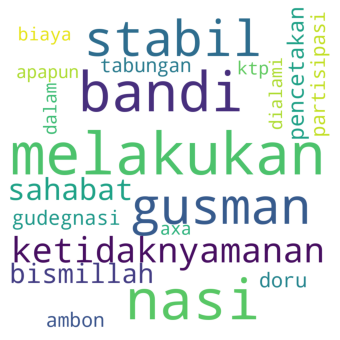

In [96]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wcp = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(word_freq_p)
plt.figure(figsize=(9,6))
plt.imshow(wcp)
plt.axis('off')
plt.show()

#### Negative

In [56]:
vec_n = CountVectorizer()
negative_doc = [row['clean_text'] for index,row in data.iterrows() if row['sentiment'] == -1]
text_n = vec_n.fit_transform(negative_doc)
word_count_n = pd.DataFrame(text_n.toarray(), columns=vec_n.get_feature_names())
word_count_n.head(10)

,ada,admin,agar,akan,akhirat,akses,aktivasi,akun,alami,ambil,...,untungnya,utama,wa,watching,web,website,wib,wkwkwk,yang,yuliana
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,0
1,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
word_list_n = vec_n.get_feature_names()
word_list_n_clean = [w for w in word_list_n if not w in k]
count_list_n = text_n.toarray().sum(axis=0) 
word_freq_n = dict(zip(word_list_n_clean,count_list_n))
sorted(word_freq_n.items(), key=lambda x: x[1], reverse=True)

[('gilee', 34),
 ('menolak', 22),
 ('duit', 15),
 ('kembalikan', 14),
 ('kompas', 11),
 ('males', 11),
 ('ambil', 10),
 ('komen', 10),
 ('miliki', 10),
 ('tuntutan', 10),
 ('apps', 9),
 ('kurir', 9),
 ('memint', 7),
 ('terimakasih', 7),
 ('arahkn', 6),
 ('awal', 6),
 ('deposit', 6),
 ('gak', 6),
 ('kasih', 6),
 ('langasung', 6),
 ('promo', 6),
 ('segerah', 6),
 ('admin', 5),
 ('arahannya', 5),
 ('dinamakan', 5),
 ('ga', 5),
 ('mungkin', 5),
 ('proses', 5),
 ('reply', 5),
 ('aktivasi', 4),
 ('akun', 4),
 ('kcp', 4),
 ('memiliki', 4),
 ('special', 4),
 ('swasta', 4),
 ('alami', 3),
 ('banget', 3),
 ('bantulah', 3),
 ('berkah', 3),
 ('berubah', 3),
 ('biar', 3),
 ('bohong', 3),
 ('cs', 3),
 ('deket', 3),
 ('itikad', 3),
 ('klikbanner', 3),
 ('mandiri', 3),
 ('melaporkan', 3),
 ('mempermasalahkan', 3),
 ('mingguan', 3),
 ('telepon', 3),
 ('akses', 2),
 ('amp', 2),
 ('andai', 2),
 ('bank', 2),
 ('bukan', 2),
 ('butuh', 2),
 ('cc', 2),
 ('dicek', 2),
 ('dijelaskannya', 2),
 ('ditawari', 2),


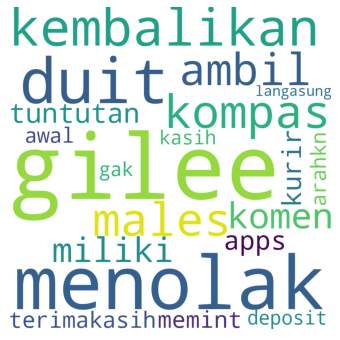

In [99]:
wcn = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(word_freq_n)
plt.figure(figsize=(9,6))
plt.imshow(wcn)
plt.axis('off')
plt.show()